In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Dataset

In [16]:
data = pd.read_csv(R'/content/kmeans_dataset.csv', delimiter=';')
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Unnamed: 6
0,12669,9656,7561,214,2674,1338,NaN
1,7057,9810,9568,1762,3293,1776,NaN
2,6353,8808,7684,2405,3516,7844,NaN
3,13265,1196,4221,6404,507,1788,NaN
4,22615,5410,7198,3915,1777,5185,NaN


In [34]:
def compute_distance(data,centers):
    data_expend= data[:,np.newaxis,:]
    center_expend = centers[np.newaxis,:,:]
    square_diff = (data_expend - center_expend)**2
    distance = square_diff.sum(axis =2)
    return distance

def assign_to_clusters(data,centers):
    distances = compute_distance(data, centers)
    clusters = np.argmin(distances, axis =1)
    return clusters

def update_center(data, cluster, K):
    new_centers = data.groupby(cluster).mean()
    # If any cluster is empty, re-initialize its center randomly
    if len(new_centers) < K:
        missing_clusters = set(range(K)) - set(new_centers.index)
        for cluster_id in missing_clusters:
            new_centers.loc[cluster_id] = data.sample(1).values[0]
    return new_centers

In [4]:
centers  = None
def update(frame):
    global centers
    plt.clf()

    #step1
    cluster = assign_to_clusters(data,centers)
    #step 2
    new_centers = update_center(data,cluster, K)
    #plot data
    plt.scatter(data[:,0], data[:,1], c= cluster)
    plt.scatter(new_centers[:,0], new_centers[:,1], c ='red', marker ='x')
    plt.title(f'Iteration {frame+1}')

    centers = new_centers

Kmeans mormal

In [5]:
data = data[['Fresh', 'Milk']]
data = data.values

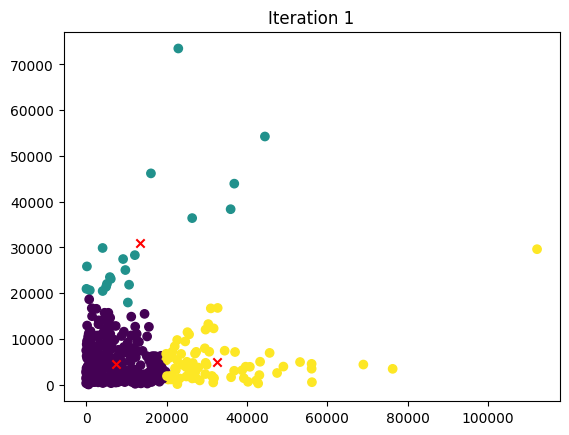

In [6]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

K = 3

#Random centers from sample
centers = data[np.random.choice(len(data), K, replace = False)]
fig, ax = plt.subplots()
ani = FuncAnimation(fig, update, frames = 30, repeat = False, blit =False)

HTML(ani.to_jshtml())

In [26]:
def k_means(data, K, max_iters=100, num_restarts =10):
    best_centers = None
    best_cost = float('inf')
    best_clusters = None

    for _ in range(num_restarts):
        centers =  data.iloc[np.random.choice(len(data), K, replace = False)]
        for _ in range(max_iters):
            cluster = assign_to_clusters(data,centers)
            new_centers = update_center(data,cluster, K)
            if np.all(centers == new_centers):
                break
            centers = new_centers

        distance = compute_distance(data, centers)
        cost = 0
        for i in range(K):
            indices = np.where(cluster == i)[0]
            cost = cost + distance[indices, i].sum()

        if cost < best_cost:
            best_center = centers
            best_cost = cost
    return best_centers, best_cost, best_clusters

Choosing the number of cluster

<function matplotlib.pyplot.show(close=None, block=None)>

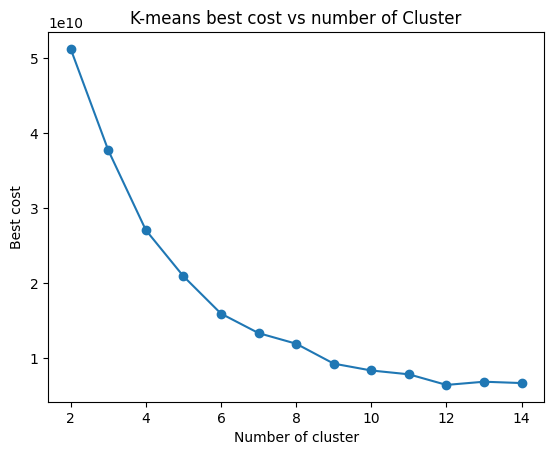

In [15]:
best_costs = []

for k_cluster in range(2,15):
    _, best_cost, _ = k_means(data, k_cluster)
    best_costs.append(best_cost)

plt.plot(range(2,15), best_costs, marker = 'o')
plt.xlabel('Number of cluster')
plt.ylabel('Best cost')
plt.title('K-means best cost vs number of Cluster')
plt.show

Multiple features

In [17]:
def get_lowest_highest_threshold(data):
  mean = data.mean()
  std = data.std()
  lowest = mean - 2*std
  highest = mean + 2*std
  return [lowest, highest]

In [39]:
data1 = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
multiple_data = data[data1]
for col in data1:
  lowest, highest = get_lowest_highest_threshold(multiple_data[col])
  multiple_data = multiple_data[(multiple_data[col]>= lowest) & (multiple_data[col] <= highest)]

In [31]:
multiple_data.values

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [13265,  1196,  4221,  6404,   507,  1788],
       ...,
       [16731,  3922,  7994,   688,  2371,   838],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [ ]:
K = 5

#Random centers from sample
centers = multiple_data[np.random.choice(len(multiple_data), K, replace=False)]
fig, ax = plt.subplots()
ani = FuncAnimation(fig, update, frames = 30, repeat = False, blit =False)

HTML(ani.to_jshtml())